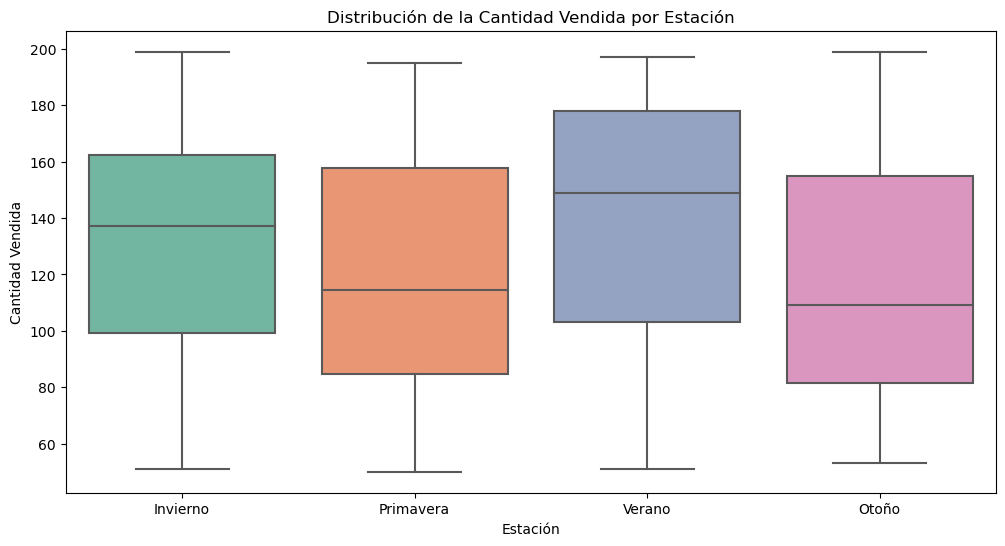

Prueba de Wilcoxon entre Invierno y Verano (muestras ajustadas):
Estadístico de la prueba: 1486.5, Valor p: 0.0348
Resultado: Hay una diferencia significativa entre las ventas en invierno y verano.
Prueba de Wilcoxon entre Invierno y Verano:
Estadístico de la prueba: 1486.5, Valor p: 0.0348
Resultado: Hay una diferencia significativa entre las ventas en invierno y verano.


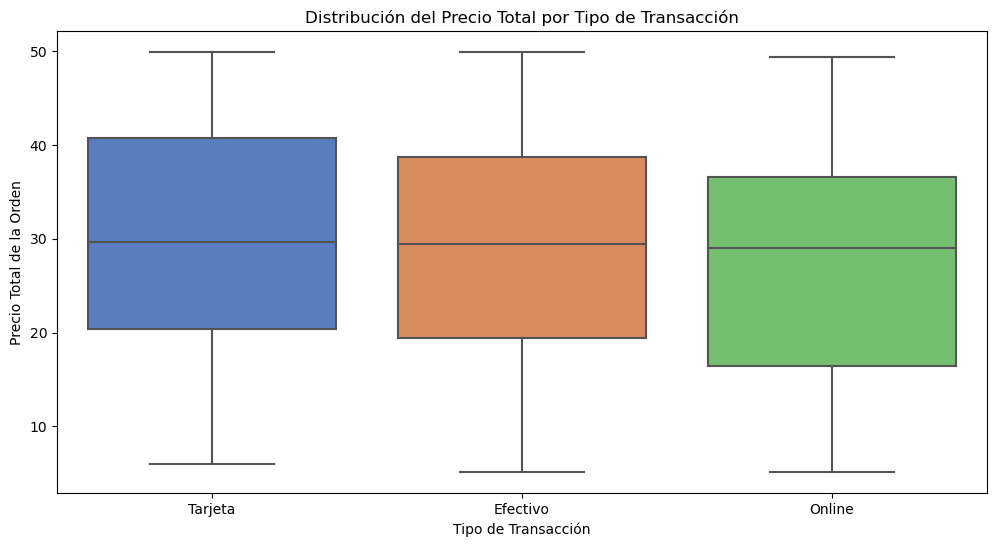

Prueba de Mann-Whitney U entre Invierno y Verano:
Estadístico de la prueba: 3318.5, Valor p: 0.0365
Resultado: Hay una diferencia significativa entre las ventas en invierno y verano.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon, kruskal

# Generar datos ficticios
np.random.seed(42)
data = pd.DataFrame({
    'Fecha': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'Cantidad_Vendida': np.random.randint(50, 200, 365),
    'Tipo_Transaccion': np.random.choice(['Efectivo', 'Tarjeta', 'Online'], 365),
    'Precio_Total': np.random.uniform(5, 50, 365)
})

# Agregar una columna de estación del año
data['Estacion'] = data['Fecha'].apply(lambda x: 'Invierno' if x.month in [12, 1, 2] else
                                        'Primavera' if x.month in [3, 4, 5] else
                                        'Verano' if x.month in [6, 7, 8] else 'Otoño')

# Gráfico de tendencia de consumo por estación
plt.figure(figsize=(12, 6))
sns.boxplot(x='Estacion', y='Cantidad_Vendida', data=data, palette='Set2')
plt.title('Distribución de la Cantidad Vendida por Estación')
plt.xlabel('Estación')
plt.ylabel('Cantidad Vendida')
plt.show()

# Ajustar las muestras a la misma longitud
min_length = min(len(invierno), len(verano))
invierno = invierno[:min_length]
verano = verano[:min_length]

# Repetir la prueba de Wilcoxon
stat, p_value = wilcoxon(invierno, verano)

print(f"Prueba de Wilcoxon entre Invierno y Verano (muestras ajustadas):")
print(f"Estadístico de la prueba: {stat}, Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Resultado: Hay una diferencia significativa entre las ventas en invierno y verano.")
else:
    print("Resultado: No hay una diferencia significativa entre las ventas en invierno y verano.")

print(f"Prueba de Wilcoxon entre Invierno y Verano:")
print(f"Estadístico de la prueba: {stat}, Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Resultado: Hay una diferencia significativa entre las ventas en invierno y verano.")
else:
    print("Resultado: No hay una diferencia significativa entre las ventas en invierno y verano.")

# Análisis comparativo de transacciones (prueba de Kruskal-Wallis)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo_Transaccion', y='Precio_Total', data=data, palette='muted')
plt.title('Distribución del Precio Total por Tipo de Transacción')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Precio Total de la Orden')
plt.show()

from scipy.stats import mannwhitneyu

# Prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(invierno, verano)

print(f"Prueba de Mann-Whitney U entre Invierno y Verano:")
print(f"Estadístico de la prueba: {stat}, Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Resultado: Hay una diferencia significativa entre las ventas en invierno y verano.")
else:
    print("Resultado: No hay una diferencia significativa entre las ventas en invierno y verano.")